# Health Insurance Cross Sell Production
## Data Analysis and EDA
*Nabhendu Das*

### Importing data


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('health_train.csv')

#### Understanding the data

In [9]:
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [10]:
dataset.shape

(381109, 12)

### Data Preprocessing

In [11]:
dataset.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
dataset = dataset.drop('Vehicle_Age', axis=1)

###### Luckily we dont have any NaN or Null values

### Exploratory Data Analysis

#### Understanding our Customers

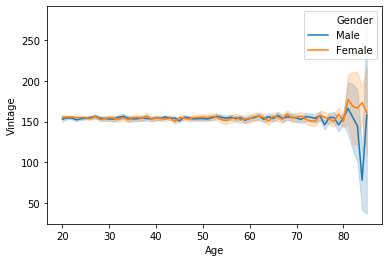

In [13]:
sns.lineplot(x="Age",y="Vintage", hue="Gender",data=dataset)

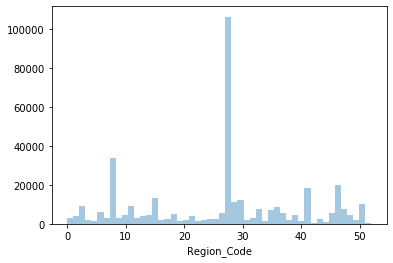

In [14]:
sns.distplot(dataset["Region_Code"],kde=False)

##### Small point of discovery, region_code 28 seems majorly activewhile others are quite generous.
##### And customer gender is quite evenly balanced with respect to vintage numbers.

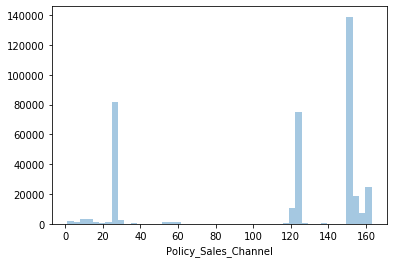

In [15]:
sns.distplot(dataset["Policy_Sales_Channel"],kde=False)

##### Also Policy_Sales_Channel 152 seems to be the quite dominant one in this particular situation.

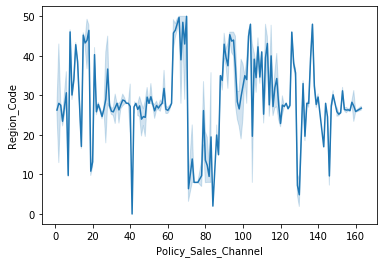

In [16]:
sns.lineplot(x="Policy_Sales_Channel",y="Region_Code",data=dataset)

##### The only point to sate here is Policy_Sales_Channel 42 and 84 are not being active in respect to the other channels.

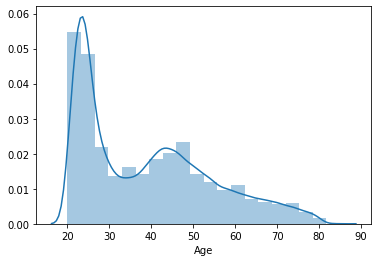

In [17]:
sns.distplot(dataset["Age"], bins=20)

###### So majority of the customers are in the age ranging from 22 to 28 and there is an odd steep down in age range of 29-38

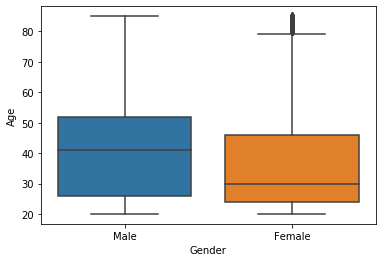

In [18]:
sns.boxplot(x=dataset['Gender'],y=dataset['Age'])

##### Giving a deep understanding about the age group with respect to gender and who really are the costumers of the policy company

#### Label Encoder for 'Gender' attribute before training

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Vehicle_Damage'] = le.fit_transform(dataset['Vehicle_Damage'])

## Training The Dataset 
##### First seperating the data into the train and test part.

In [20]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

##### Standardization for scalling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,8:]=sc.fit_transform(X_train[:,8:])
X_test[:,8:]=sc.transform(X_test[:,8:])

## Model Deployment

#### Model Deployed: Regression

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
print(y_pred)

[-0.01951775 -0.01528469  0.27288156 ...  0.23709746 -0.00840246
 -0.01582915]


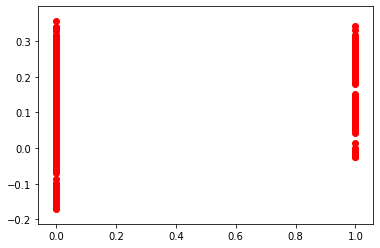

In [26]:
plt.scatter(y_test,y_pred,color='red')

##### Well as you can see even though it is giving our prediction in 0 and one but exact values are in decimal as this situation should be handle by Classification Model 

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [29]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [31]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Now let's check the accuracy of our decision tree classifier

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[60266  6786]
 [ 6405  2765]]


In [35]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.8269397286872556


#### Well now as we can see our classifier is providing a whooping accuracy of 82.69% which is quite acceptable